In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df_base = pd.read_csv('../data/processed/data_processed_1990_2023.csv', index_col='fecha')
df_base.drop('target', axis=1, inplace=True)
df_base.index = pd.to_datetime(df_base.index)

df_base.tail(7)

,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec
fecha,,,,,,,,,,
2023-03-02,0.5,16.9,8.7,1014.4,1017.7,30.0,1.1,5.8,11.0,0.0
2023-03-03,0.1,18.5,9.3,1013.9,1018.1,5.0,1.4,5.8,10.8,0.0
2023-03-04,6.8,17.9,12.4,1014.5,1017.6,99.0,1.9,5.0,5.2,0.0
2023-03-05,6.0,15.5,10.8,1011.0,1015.3,99.0,0.6,5.0,0.0,1.5
2023-03-06,10.3,15.9,13.1,1008.7,1013.4,21.0,1.9,8.3,0.0,3.3
2023-03-07,12.9,19.7,16.3,1009.8,1013.4,22.0,3.9,10.3,3.2,0.6
2023-03-08,14.4,20.5,17.4,1011.6,1015.1,22.0,6.1,10.3,3.2,2.5


In [47]:
df_last_500 = df_base.iloc[-500:]
df_last_500.head()

,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec
fecha,,,,,,,,,,
2021-10-25,11.2,26.6,18.9,1013.7,1018.0,99.0,1.9,6.1,8.9,0.0
2021-10-26,12.6,26.6,19.6,1014.2,1017.2,8.0,2.8,9.2,8.2,0.0
2021-10-27,12.5,26.3,19.4,1013.8,1017.7,6.0,4.2,10.8,10.2,0.0
2021-10-28,12.5,25.9,19.2,1010.8,1015.1,21.0,2.2,7.8,9.8,0.0
2021-10-29,16.4,23.6,20.0,1009.2,1013.1,22.0,7.2,15.3,1.1,1.5


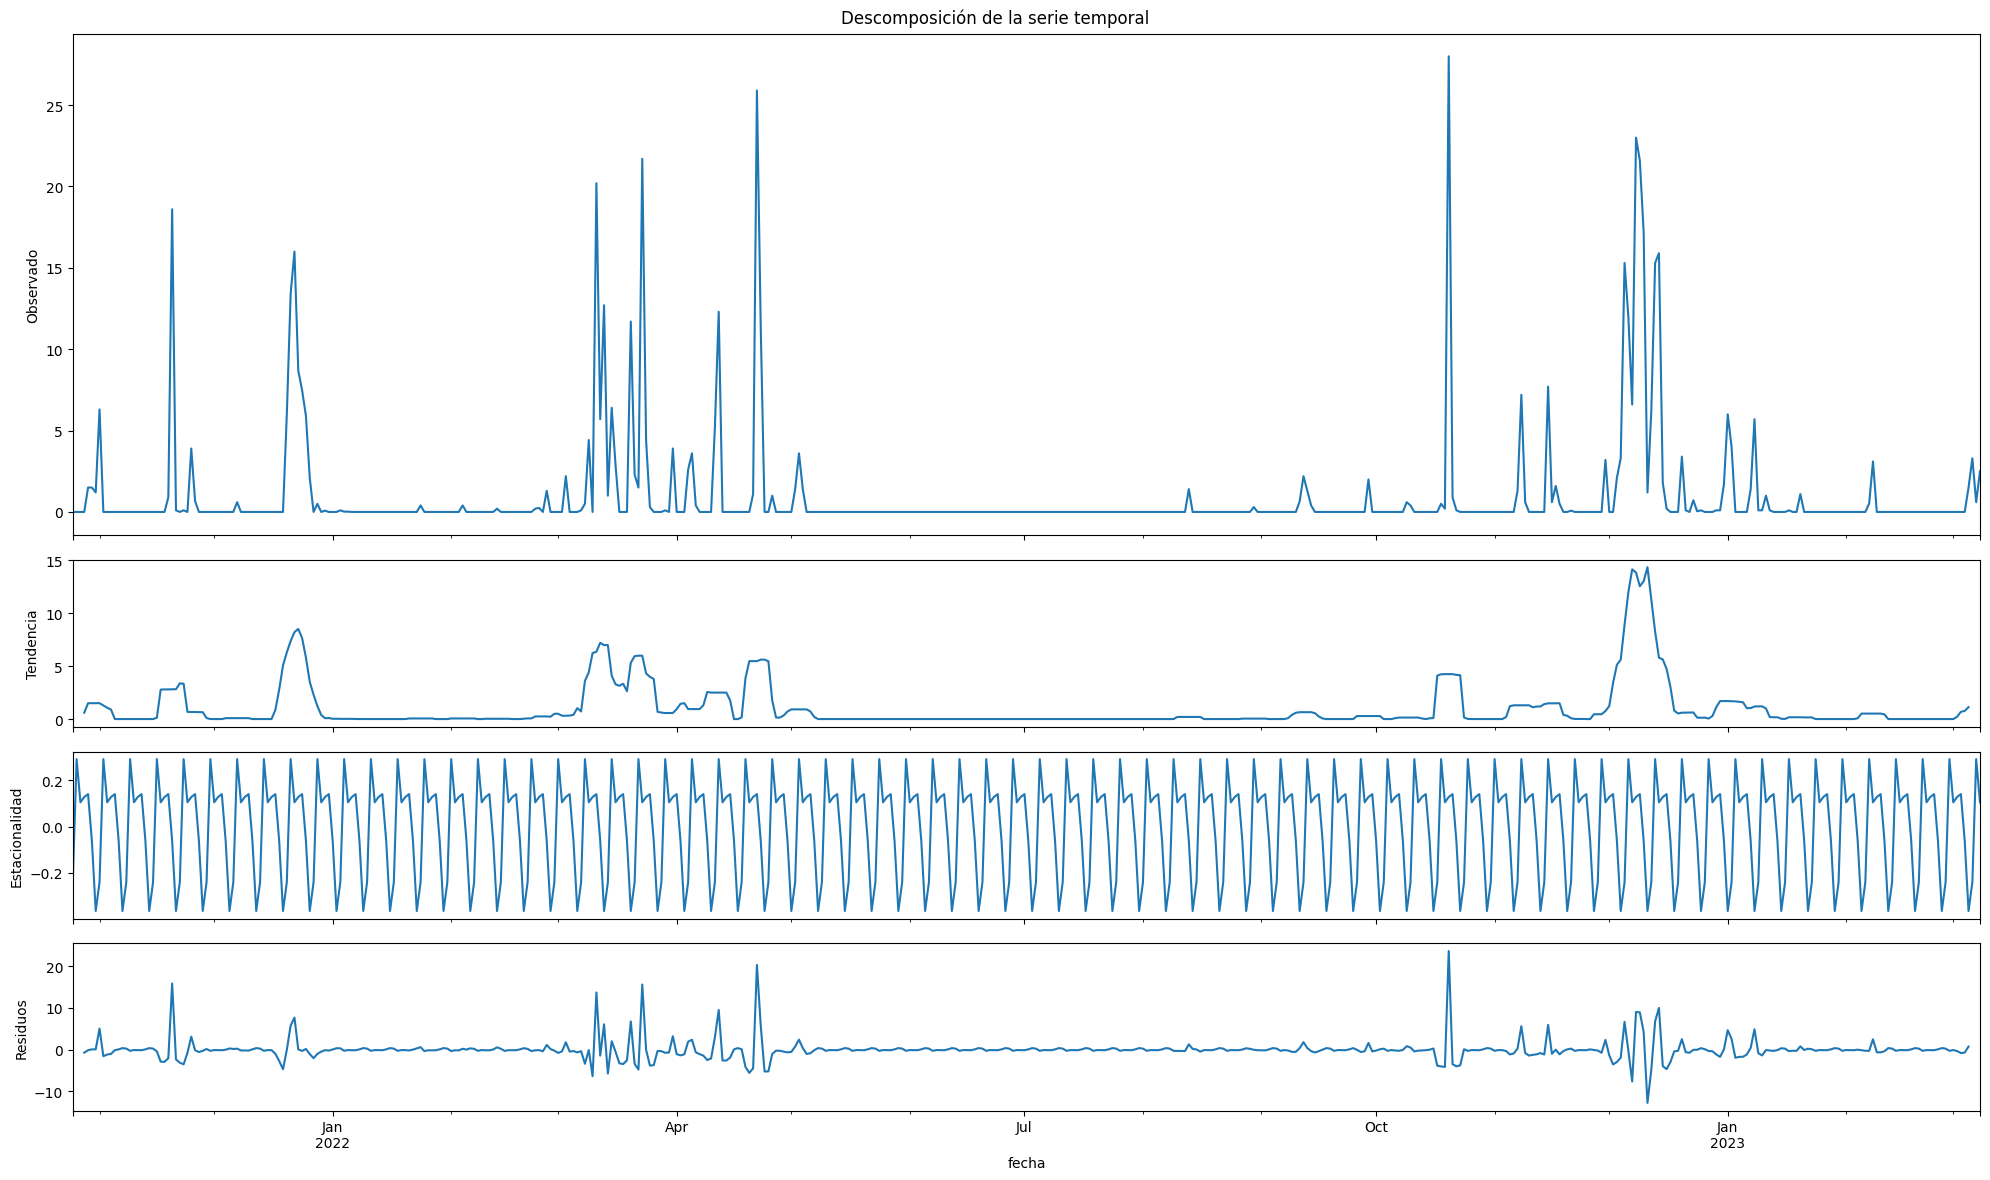

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_last_500['prec'], model="additive")

# Reescalar el plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# Graficar cada una de las subplots
decompose_data.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observado')

decompose_data.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Tendencia')

decompose_data.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Estacionalidad')

decompose_data.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residuos')

# Agregar título a la figura
fig.suptitle('Descomposición de la serie temporal')

# Ajustar el espaciado entre las subplots
fig.tight_layout()

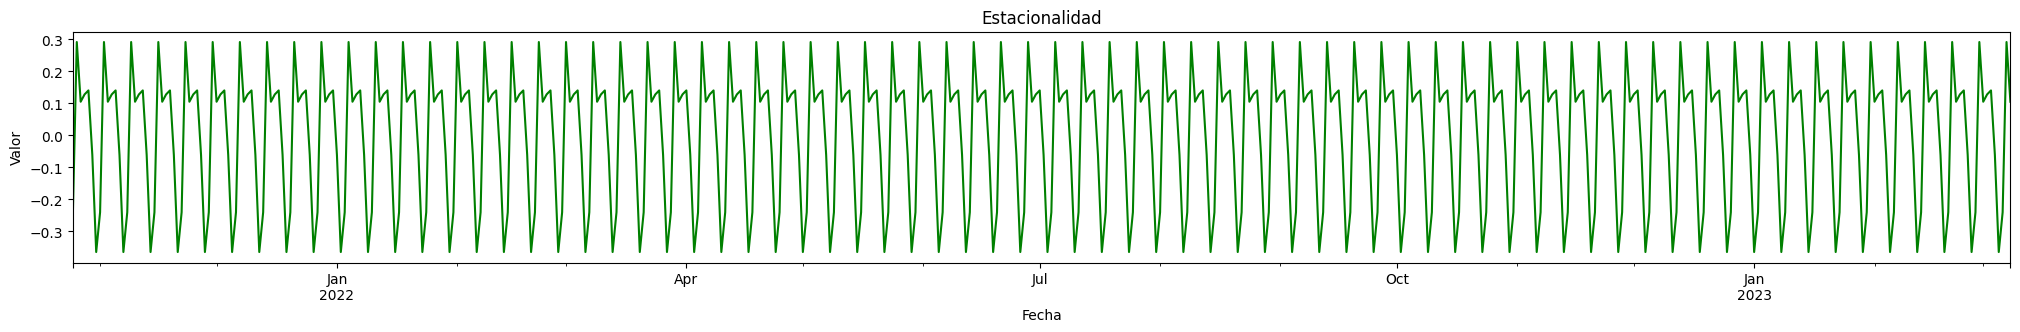

In [49]:
seasonality=decompose_data.seasonal
# Reescalar el plot
fig, ax = plt.subplots(figsize=(25, 3))

# Graficar la serie temporal
seasonality.plot(ax=ax, color='green')

# Agregar título y etiquetas a los ejes
ax.set_title('Estacionalidad')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

# Mostrar el plot
plt.show()

ADFULLER

In [56]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_last_500['prec'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.359224160783927
2. P-Value :  9.598287135948535e-11
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 496
5. Critical Values :
	 1% :  -3.4436029548776395
	 5% :  -2.867384756137026
	 10% :  -2.5698830308597813


Esto da casi cero. Esto es más estacionario que sus muertos.

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_last_500['prec'], order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()


c:\Users\juand\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\juand\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\juand\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   prec   No. Observations:                  500
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1285.723
Date:                Tue, 14 Mar 2023   AIC                           2577.446
Time:                        23:56:42   BIC                           2590.083
Sample:                    10-25-2021   HQIC                          2582.405
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3899      0.026     14.854      0.000       0.338       0.441
ma.L1         -0.9589      0.011    -86.951      0.000      -0.981      -0.937
sigma2        10.0927      0.164     61.559      0.000       9.771      10.414
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):             19947.31
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             4.48
Prob(H) (two-sided):                  0.34   Kurtosis:                        32.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\juand\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='fecha'>

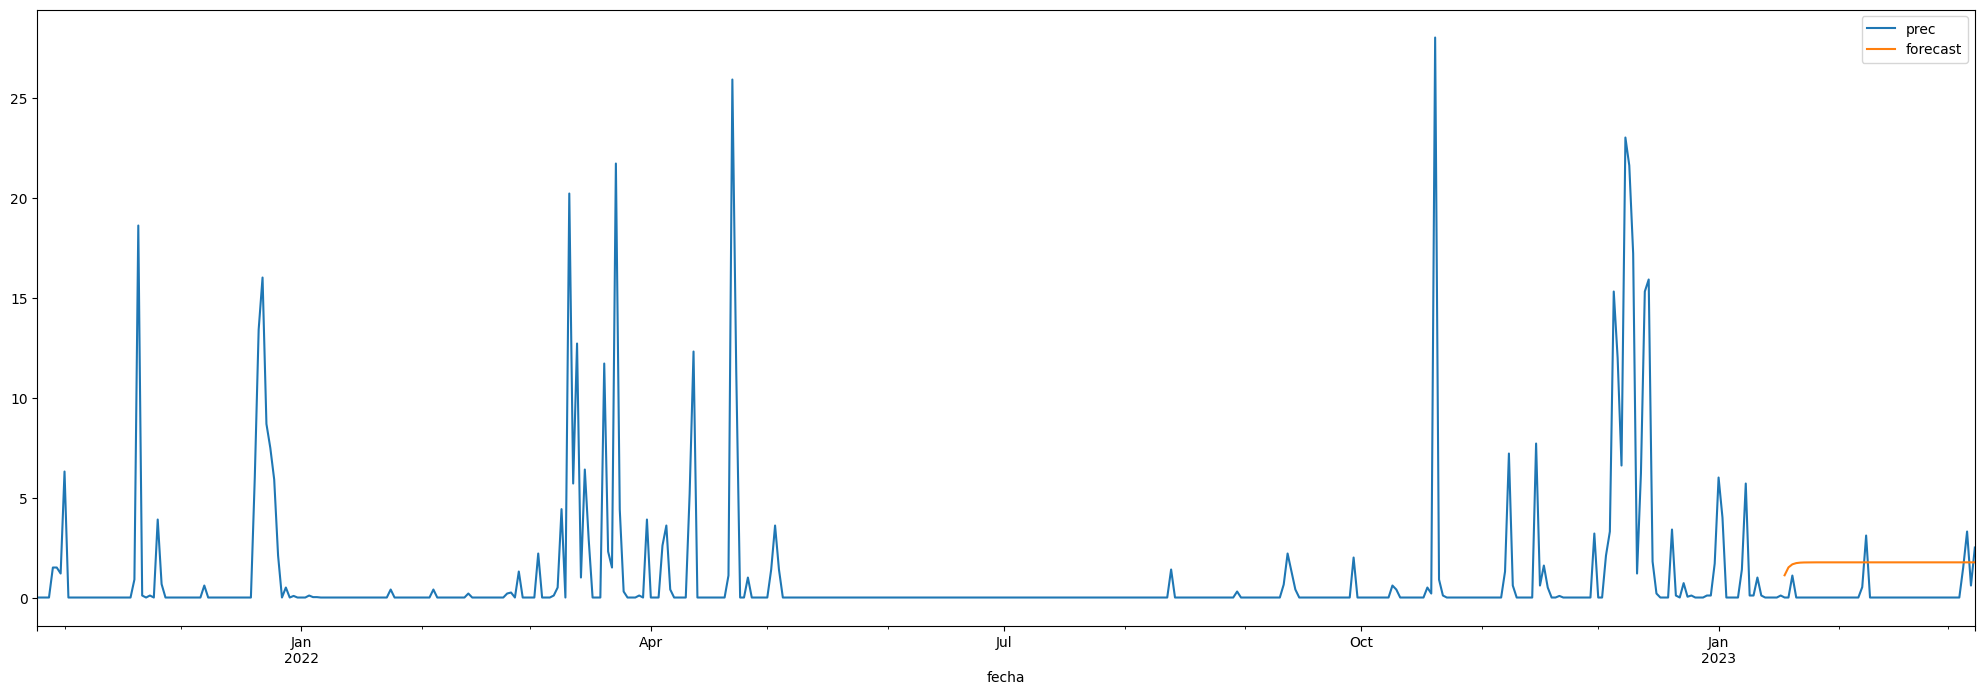

In [59]:
df_last_500['forecast'] = model_fit.predict(start=450, end=500, dynamic=True)
df_last_500[['prec', 'forecast']].plot(figsize=(25, 8))


c:\Users\juand\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\juand\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\juand\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='fecha'>

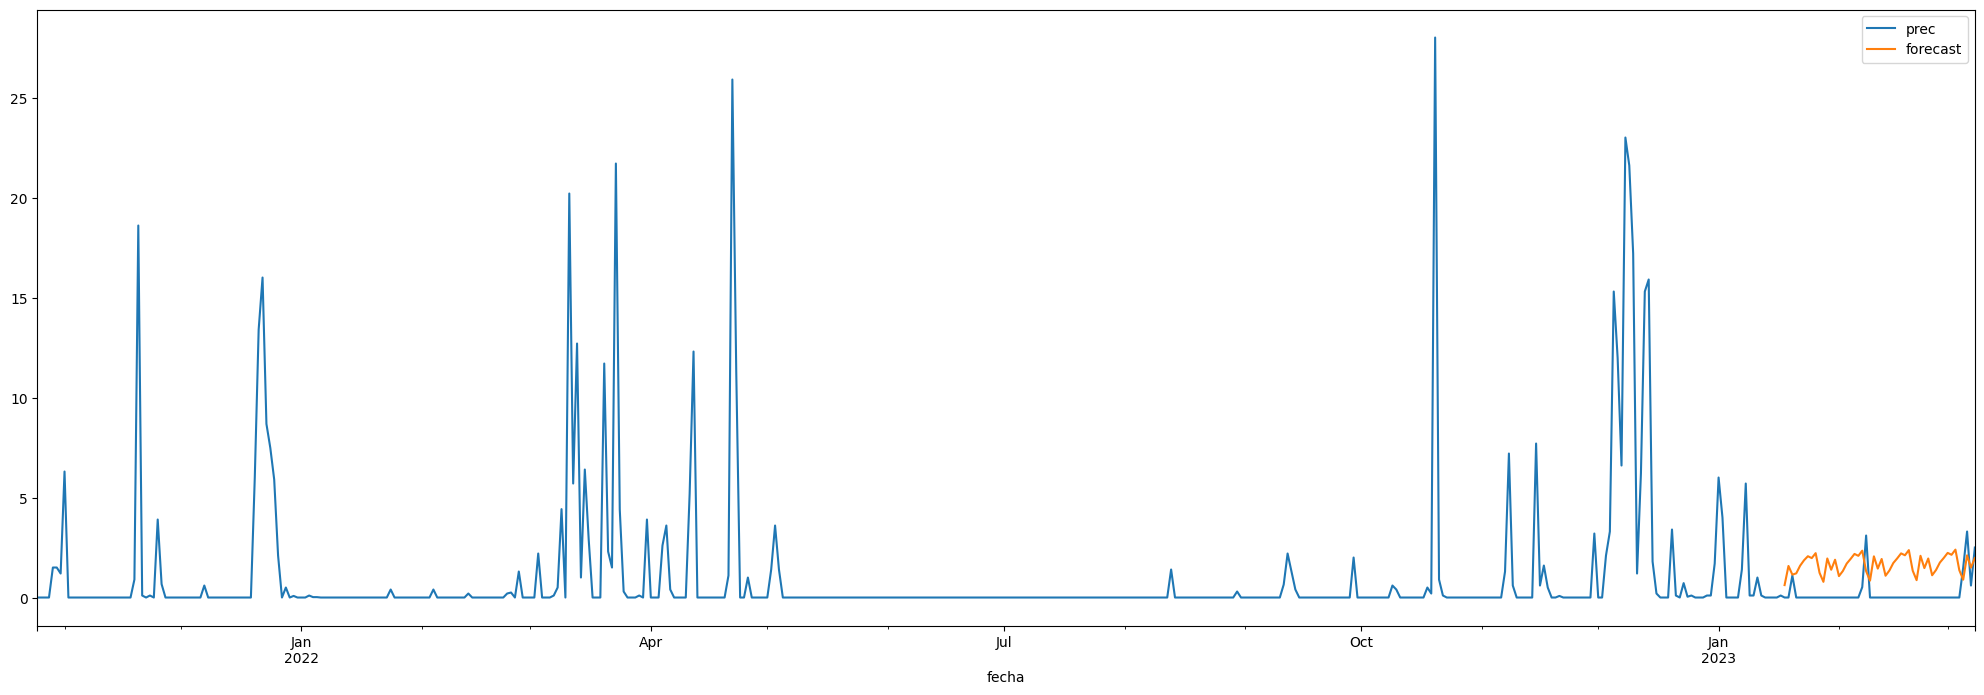

In [62]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(
    df_last_500['prec'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

df_last_500['forecast'] = results.predict(start=450, end=500, dynamic=True)
df_last_500[['prec', 'forecast']].plot(figsize=(25, 8))


------

auto arima 
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

In [63]:
df_base = pd.read_csv('../data/processed/data_processed_1990_2023.csv', index_col='fecha')
df_base.drop('target', axis=1, inplace=True)
df_base.index = pd.to_datetime(df_base.index)
df_last_500 = df_base.iloc[-500:]

In [66]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df_base['prec'])

(0.01, False)

In [71]:
train = df_base['prec'][:-50]
test = df_base['prec'][-50:]

NO ESTACIONARIO

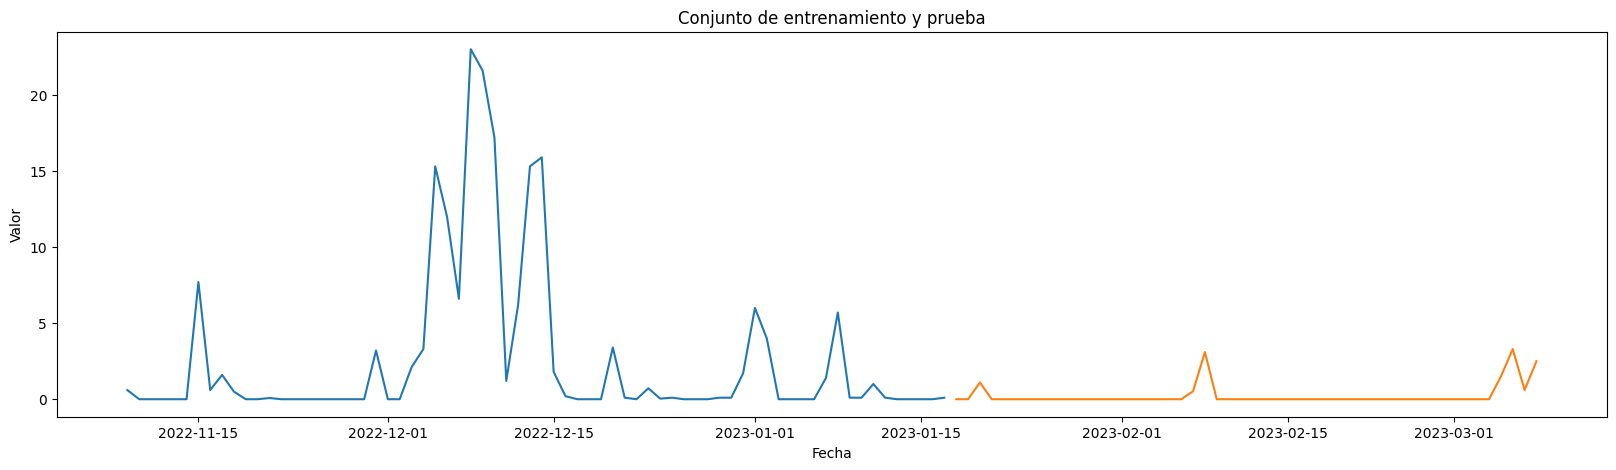

In [79]:
# Reescalar el plot
fig, ax = plt.subplots(figsize=(20, 5))

# Graficar las series temporales
ax.plot(train[12000:])
ax.plot(test)

# Agregar título y etiquetas a los ejes
ax.set_title('Conjunto de entrenamiento y prueba')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

# Mostrar el plot
plt.show()

In [85]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5, start_P=0,
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=85922.144, Time=0.28 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=80564.751, Time=1.55 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=11.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=83801.699, Time=0.33 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=78941.759, Time=3.52 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=78298.875, Time=6.17 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=77824.753, Time=13.22 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=77491.872, Time=34.31 sec


In [ ]:
arima_model.summary()